In [15]:
import numpy as np
from numpy import linalg as LA
class KNN_classifier:
  def __init__(self, n_neighbors: int, **kwargs):
    self.K = n_neighbors
  def fit(self, x: np.array, y: np.array):
    self.X=x
    self.y=y
  def predict(self, x: np.array):
    predictions = []
    distances=np.ndarray(shape=(len(self.X), 2))
    for i in x:
      for j in range(len(self.X)):
        m=i-self.X[j]
        distances[j][0]=LA.norm(m)
        distances[j][1]=self.y[j]
      for j in range(0, len(distances)-1) :
        for k in range(0, len(distances)-1-j) :
          if distances[k][0]>distances[k+1][0] :
            t=distances[k][0]
            distances[k][0]=distances[k+1][0]
            distances[k+1][0]=t
            t=distances[k][1]
            distances[k][1]=distances[k+1][1]
            distances[k+1][1]=t
      classes=np.ndarray(len(distances), )
      classes=distances[:self.K, 1]
      values, counts = np.unique(classes, return_counts=True)
      
      predictions.append(values[np.argmax(counts)])
    predictions = np.array(predictions)
    return predictions

Создадим выборку, чтобы проверить работу алгоритма

Text(0, 0.5, 'x')

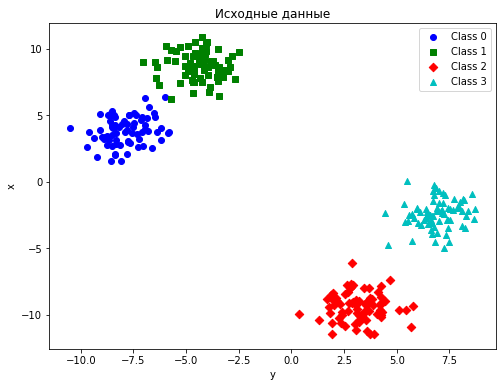

In [13]:
from matplotlib import pyplot  as plt
import pandas as pd
import sklearn.datasets
import numpy as np
X, labels = sklearn.datasets.make_blobs(n_samples=300, n_features=2, centers=4)
X=np.array(X)
labels=np.array(labels)
plt.figure(figsize=(8, 6))
classes = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.75', 'pink', 'orange']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x']
for i, cls in enumerate(classes):
    idx = labels == cls
    plt.scatter(X[idx, 0], X[idx, 1], c=colors[i], marker=markers[i], label=f'Class {cls}')

plt.legend(loc='best')
plt.title('Исходные данные')
plt.xlabel('y')
plt.ylabel('x')

Проверим работу алгоритма

In [16]:
model=KNN_classifier(n_neighbors=9)
model.fit(X, labels)
test=np.ndarray(shape=(1, 2), )
test[0][0]=3
test[0][1]=3
print(model.predict(test))

[3.]
